In [1]:
import time
from auto_robot_design.pinokla.closed_loop_kinematics import closedLoopProximalMount

from auto_robot_design.pinokla.calc_criterion import search_workspace
from pinocchio.visualize import MeshcatVisualizer
import meshcat
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

import pinocchio as pin
from auto_robot_design.pinokla.closed_loop_kinematics import ForwardK
from auto_robot_design.pinokla.closed_loop_jacobian import jacobian_constraint

from auto_robot_design.description.builder import ParametrizedBuilder, DetailedURDFCreatorFixedEE, jps_graph2pinocchio_robot
from auto_robot_design.generator.restricted_generator.two_link_generator import TwoLinkGenerator
from testing_ground.singular_hell.workspace_run import WorkspaceRunner, reduce_constr_dict
from testing_ground.singular_hell.workspace_run import WorkspaceLoader, kin_graph2pinocchio_robot
from testing_ground.singular_hell.workspace_search import calc_ee_range_of_2linker
from auto_robot_design.description.utils import draw_links
%load_ext autoreload
%autoreload 2

In [2]:
def plot_next_restored_variant(wl):
    #variant
    d = next(wl.data)
    wl.mutate_graph(wl.restore_variant(d))

    fig = plt.figure(figsize=(10,4.8), dpi=110)
    ax = fig.add_subplot(1, 2, 1)
    
    kinematic_graph = wl.prepare_kinematic_graph(is_showed=False)
    draw_links(kinematic_graph, wl.graph)
    # plt.show()

    ee_b = calc_ee_range_of_2linker(kinematic_graph)

    #points array
    d = next(wl.data)
    
    # ax = plt.gca()
    ax2 = fig.add_subplot(1, 2, 2)

    if wl.extra_data is not None:
        ed = next(wl.extra_data)
        plt.scatter(ed[:,0], ed[:,1],c='r',linewidths=0,s=2)
    plt.scatter(d[:,0], d[:,1],c='b',linewidths=0,s=5)

    plt.xlim(ee_b)
    plt.ylim(ee_b)

    ax2.set_aspect(1)
    plt.tight_layout()
    plt.show()
    return kinematic_graph

In [3]:
def vis_robot(robot):
    q0 = closedLoopProximalMount(
    robot.model,
    robot.data,
    robot.constraint_models,
    robot.constraint_data,
    max_it=100,
    )
    viz = MeshcatVisualizer(robot.model, robot.visual_model, robot.visual_model)
    # viz.viewer = meshcat.Visualizer().open()
    # viz.clean()
    # viz.loadViewerModel()
    viz.initViewer(loadModel=True)
    viz.display(q0)
    return viz

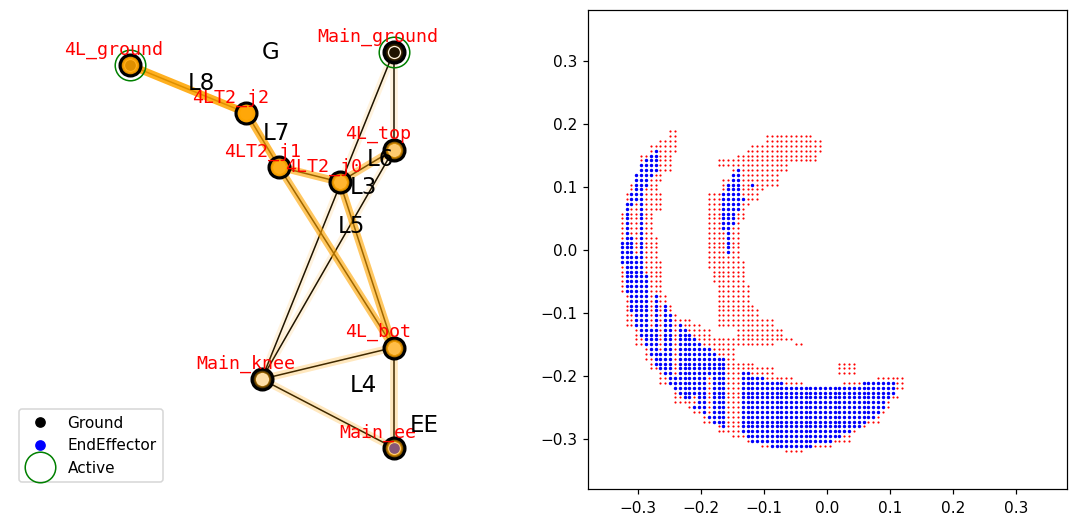

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [4]:
wl = WorkspaceLoader(fname = 'ooga')
urdf_builder = ParametrizedBuilder(DetailedURDFCreatorFixedEE, thickness=0.015)

kinematic_graph = plot_next_restored_variant(wl)
robo, _ = kin_graph2pinocchio_robot(kinematic_graph, urdf_builder)
viz = vis_robot(robo)

In [5]:
hasattr(viz.viewer, 'jupyter_cell') and viz.viewer.jupyter_cell()

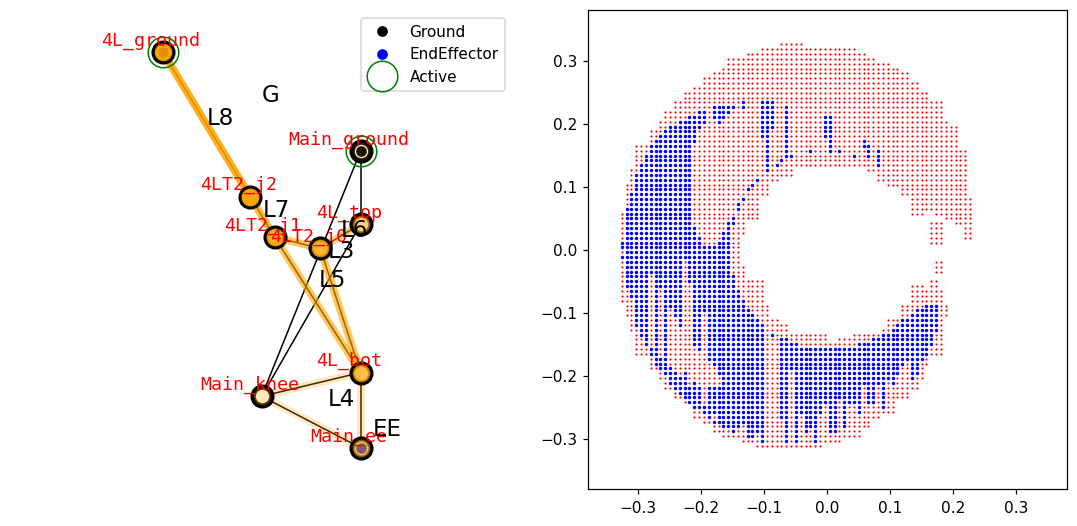

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7031/static/


In [9]:
kinematic_graph = plot_next_restored_variant(wl)
robo, _ = kin_graph2pinocchio_robot(kinematic_graph, urdf_builder)
viz = vis_robot(robo)

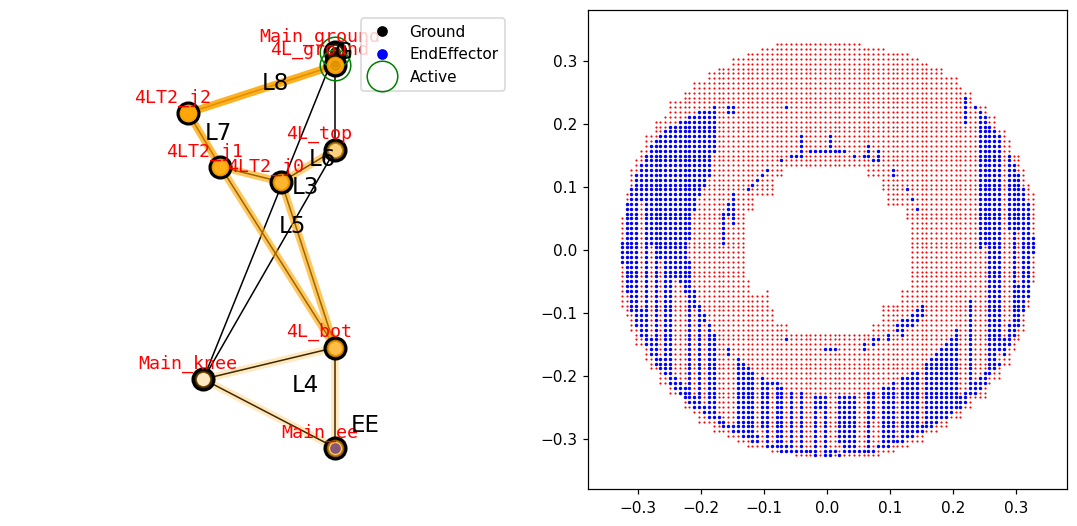

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7032/static/


In [11]:
kinematic_graph = plot_next_restored_variant(wl)
robo, _ = kin_graph2pinocchio_robot(kinematic_graph, urdf_builder)
viz = vis_robot(robo)

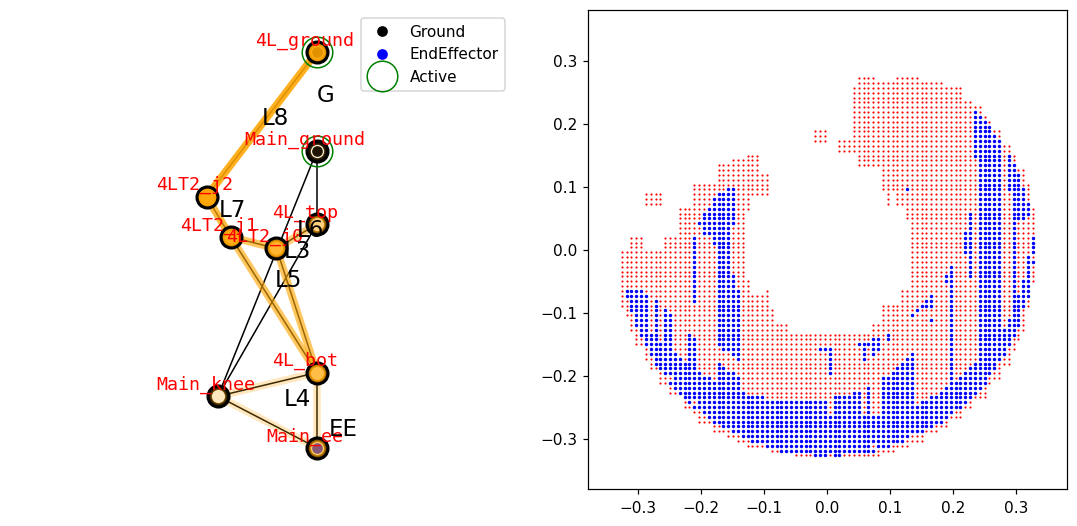

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7033/static/


In [13]:
kinematic_graph = plot_next_restored_variant(wl)
robo, _ = kin_graph2pinocchio_robot(kinematic_graph, urdf_builder)
viz = vis_robot(robo)

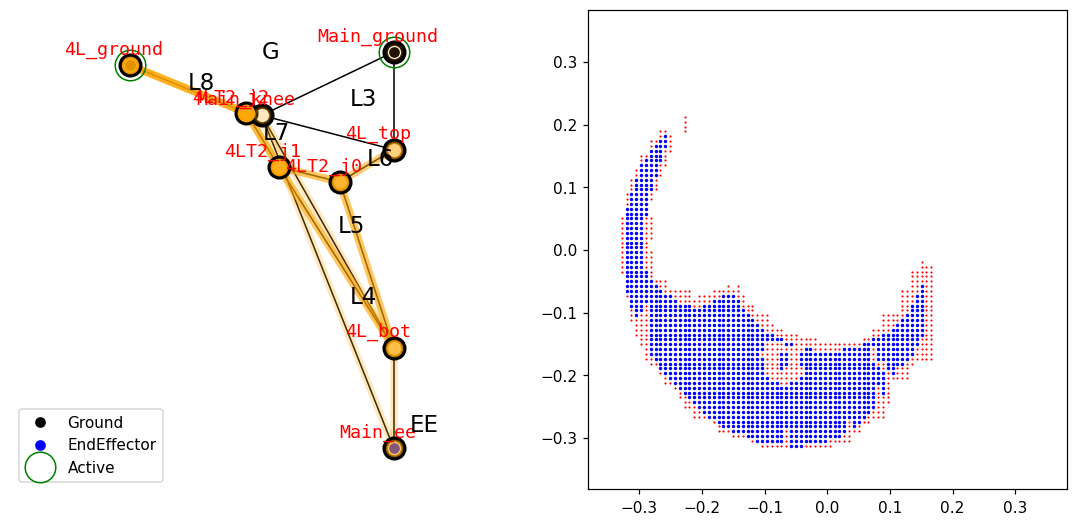

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7034/static/


In [15]:
kinematic_graph = plot_next_restored_variant(wl)
robo, _ = kin_graph2pinocchio_robot(kinematic_graph, urdf_builder)
viz = vis_robot(robo)

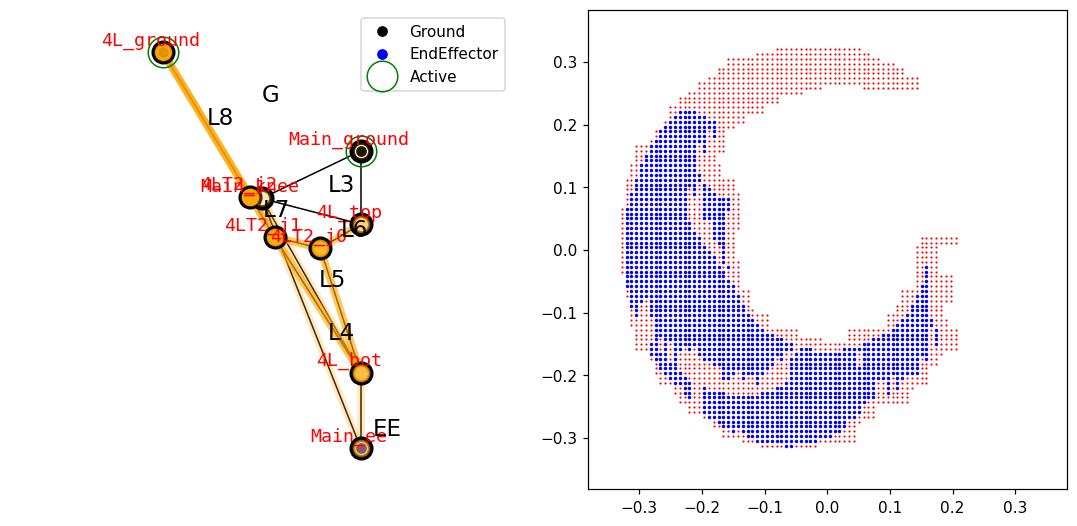

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7035/static/


In [17]:
kinematic_graph = plot_next_restored_variant(wl)
robo, _ = kin_graph2pinocchio_robot(kinematic_graph, urdf_builder)
viz = vis_robot(robo)